In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('our-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGCCGACCTCGGAATGCGGTCCCATCCACGTTT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAAGTCCCACGGCAAGCAACTCTTGATCCCCACCTCAAGAGGT...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGAACGCCCGCAGCGACCCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCGCAGAAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTTTGACC...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
pairs = []
pairs_no_pos = []


for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:12<00:00, 818.11it/s]


In [10]:
import numpy as np


In [11]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [12]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> GTC 6
T -> AGG 6
G -> AAAA 6
 -> TTC 6
TCA ->  6
 -> TTA 6
AC -> G 6
T -> AAAA 6
ATG ->  6
CTC ->  6
AT -> G 6
 -> TGT 6
 -> ACT 6
CGC ->  6
 -> AGG 6
C -> AT 7
CGT ->  7
TAG ->  7
GTC ->  7
 -> GGC 7
AGC ->  7
TAT ->  7
ACG ->  7
AT -> C 7
 -> TCT 7
 -> AGA 7
T -> GGA 7
A -> GGG 7
GAC ->  7
 -> CTC 7
 -> ATA 7
 -> TAT 7
A -> TG 8
 -> GCT 8
C -> GGG 8
A -> GC 8
TT -> C 8
AGA ->  8
TA -> C 8
 -> ATC 8
CGA ->  8
TGT ->  8
 -> ACG 8
 -> AAAA 8
CAT ->  8
 -> TAC 8
G -> CT 8
 -> CGC 9
ACT ->  9
C -> GA 9
TAC ->  9
CT -> G 9
TGA ->  9
CTG ->  9
 -> CGA 10
 -> TGG 10
GCA ->  10
TA -> G 10
 -> GTT 10
CG -> A 10
 -> GCA 10
 -> GCG 10
TCG ->  10
ATC ->  10
 -> AGC 10
 -> ACA 11
TGC ->  11
 -> GCC 11
A -> TC 11
 -> TTG 11
CAG ->  11
 -> TGC 11
 -> TAA 11
 -> CTT 12
 -> GGA 12
TC -> A 12
 -> CTA 12
TG -> C 12
GCT ->  12
 -> CCT 12
A -> CCC 12
 -> AAT 12
 -> ACC 12
A -> CT 12
A -> GT 12
 -> ATT 12
C -> AG 13
 -> GGT 13
T -> GGG 13
AG -> C 14
GC -> A 14
G -> TC 14
C -> TA 14
 -> CAC 15
GAT ->  1

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [14]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


A -> G @ 41 6
 -> G @ 23 6
 -> G @ 19 6
 -> G @ 104 6
A -> T @ 87 6
AC ->  @ 54 6
 -> G @ 13 6
A -> CC @ 55 6
A -> G @ 79 6
A -> T @ 95 6
A -> G @ 27 6
T -> G @ 95 6
 -> C @ 42 6
 -> C @ 94 6
T -> A @ 50 6
 -> A @ 12 6
 -> A @ 13 6
 -> A @ 3 6
T -> A @ 58 6
TT ->  @ 55 6
 -> A @ 7 6
 -> A @ 84 6
 -> A @ 89 6
A -> G @ 49 6
 -> AAG @ 54 6
 -> AC @ 52 6
 -> AG @ 52 6
 -> C @ 103 6
 -> C @ 105 6
 -> C @ 108 6
 -> C @ 12 6
 -> C @ 27 6
TG ->  @ 56 6
TG ->  @ 55 6
 -> G @ 30 6
 -> C @ 7 6
 -> C @ 91 6
 -> CC @ 57 6
 -> G @ 31 6
 -> G @ 87 6
 -> G @ 6 6
A -> C @ 18 6
A -> C @ 16 6
 -> T @ 31 6
A -> C @ 105 6
 -> T @ 48 6
 -> T @ 49 6
T -> G @ 102 6
 -> T @ 62 6
 -> T @ 69 6
 -> T @ 72 6
T -> G @ 104 6
 -> T @ 16 6
 -> T @ 79 6
 -> T @ 81 6
 -> T @ 83 6
T -> G @ 14 6
T -> G @ 29 6
 -> T @ 89 6
 -> T @ 93 6
 -> T @ 96 6
T -> G @ 7 6
 -> T @ 98 6
 -> TA @ 52 6
T -> G @ 87 6
 -> T @ 80 6
A -> C @ 29 6
A -> C @ 35 6
A -> C @ 37 6
A -> C @ 9 6
 -> G @ 84 6
 -> G @ 86 6
A -> T @ 63 6
A -> C @ 82 6
A

In [15]:
import matplotlib.pyplot as plt

In [16]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[16, 40, 71, 96, 124, 171, 159, 152, 203, 193, 198, 207, 213, 196, 203, 235, 247, 239, 258, 250, 252, 267, 252, 254, 276, 257, 259, 264, 288, 256, 286, 282, 285, 262, 300, 274, 319, 301, 296, 286, 331, 308, 285, 313, 314, 314, 302, 321, 321, 322, 355, 404, 642, 1091, 2780, 1436, 774, 487, 351, 375, 336, 326, 309, 305, 331, 304, 320, 335, 312, 342, 281, 307, 332, 273, 256, 309, 289, 290, 304, 262, 270, 268, 251, 261, 271, 274, 252, 230, 266, 254, 235, 239, 245, 235, 225, 225, 237, 234, 232, 205, 215, 174, 194, 182, 174, 168, 163, 124, 91, 36, 61]


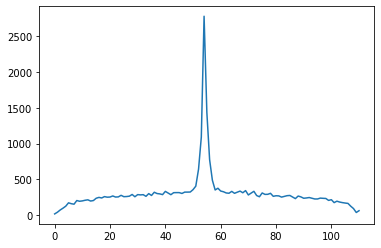

In [17]:
plt.plot(range(strand_len + 1), pos_counts)

In [18]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[3, 1, 10, 5, 4, 8, 5, 7, 4, 7, 4, 8, 3, 5, 4, 2, 6, 4, 10, 4, 10, 10, 4, 13, 6, 11, 10, 10, 9, 5, 7, 6, 4, 12, 8, 12, 13, 8, 2, 11, 4, 5, 5, 8, 5, 8, 2, 9, 6, 6, 10, 13, 53, 98, 341, 99, 39, 8, 9, 9, 5, 9, 6, 8, 8, 9, 10, 4, 4, 6, 8, 5, 6, 7, 8, 5, 7, 8, 8, 6, 6, 6, 1, 6, 1, 8, 5, 5, 10, 6, 3, 4, 5, 6, 9, 8, 6, 5, 6, 4, 8, 4, 3, 3, 3, 4, 4, 4, 0, 2, 3]


In [19]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


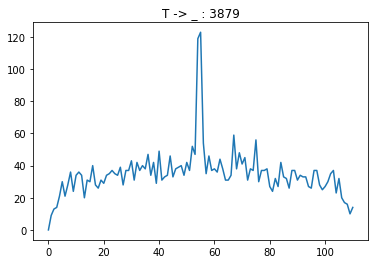

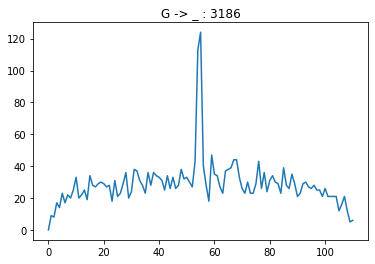

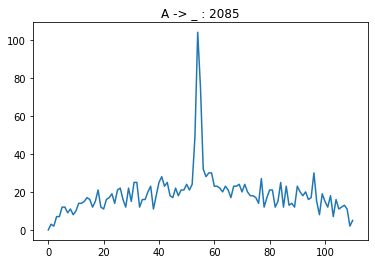

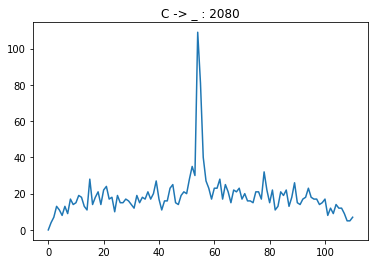

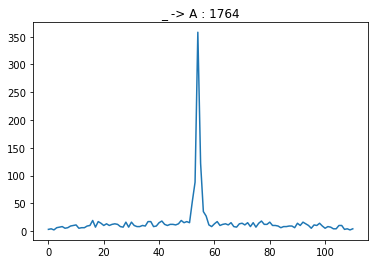

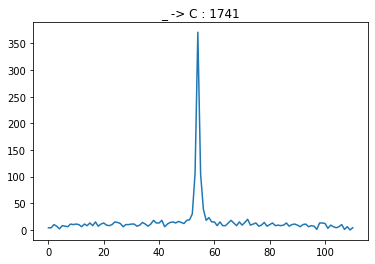

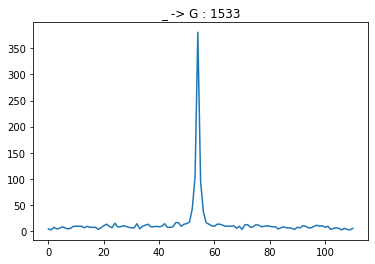

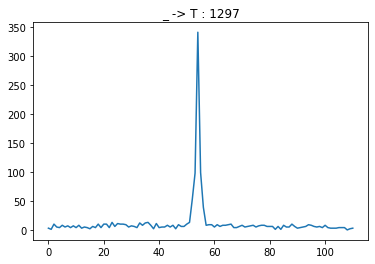

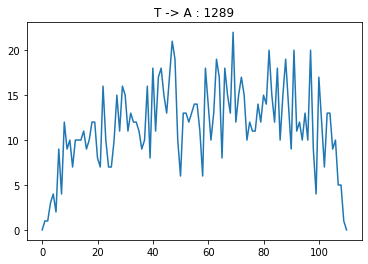

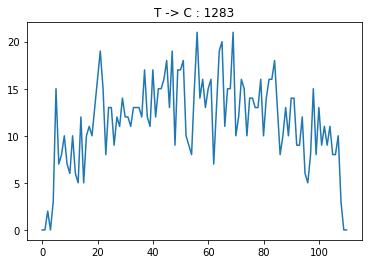

In [20]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [21]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)